In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leads-score/Leads.csv


In [2]:
df=pd.read_csv("/kaggle/input/leads-score/Leads.csv")

In [3]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df["Lead Number"].duplicated().sum()

0

In [7]:
df["Prospect ID"].duplicated().sum()

0

In [8]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
df["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [10]:
df1=df[df["Lead Origin"]!="Quick Add Form"]

In [11]:
# Create an instance of the LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


df1['Lead Origin']=label_encoder.fit_transform(df1['Lead Origin'])


/tmp/ipykernel_20/1432858158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Lead Origin']=label_encoder.fit_transform(df1['Lead Origin'])


In [12]:
df1["Lead Origin"]

0       0
1       0
2       1
3       1
4       1
       ..
9235    1
9236    1
9237    1
9238    1
9239    1
Name: Lead Origin, Length: 9239, dtype: int64

In [13]:
a=df1["Lead Source"].value_counts()
b=a[a<7]
b.index

Index(['bing', 'google', 'Click2call', 'Press_Release', 'Social Media',
       'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads',
       'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'],
      dtype='object')

In [14]:
def cat(text):
    if text in b:
        return "other"
    else:
        return text


In [15]:
df1["Lead Source"]=df1["Lead Source"].apply(cat)

/tmp/ipykernel_20/3870558296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Lead Source"]=df1["Lead Source"].apply(cat)


In [16]:
df1["Lead Source"].value_counts() 

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
other                 28
Name: Lead Source, dtype: int64

In [17]:
df1["Lead Source"]=label_encoder.fit_transform(df1['Lead Source'])


/tmp/ipykernel_20/613665431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Lead Source"]=label_encoder.fit_transform(df1['Lead Source'])


In [18]:
df1["Lead Source"]

0       3
1       4
2       0
3       0
4       2
       ..
9235    0
9236    0
9237    0
9238    2
9239    0
Name: Lead Source, Length: 9239, dtype: int64

In [19]:
df1=df1.drop("Get updates on DM Content",axis=1)

In [20]:
df1=df1.drop("Update me on Supply Chain Content",axis=1)

In [21]:
df1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,3,No,No,0,0.0,0,0.00,...,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,4,No,No,0,5.0,674,2.50,...,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,0,No,No,1,2.0,1532,2.00,...,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,1,0,No,No,0,1.0,305,1.00,...,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2,No,No,1,2.0,1428,1.00,...,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,1,0,Yes,No,1,8.0,1845,2.67,...,High in Relevance,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,1,0,No,No,0,2.0,238,2.00,...,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,1,0,Yes,No,0,2.0,199,2.00,...,Not Sure,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,1,2,No,No,1,3.0,499,3.00,...,NaN,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [22]:
df1["Lead Quality"]=label_encoder.fit_transform(df1["Lead Quality"])

In [23]:
df1["Lead Profile"]=df1["Lead Profile"].replace("Select",np.nan)

In [24]:
df1["Lead Profile"]=label_encoder.fit_transform(df1["Lead Profile"])

In [25]:
df1.City=df1.City.replace("Select",np.nan)

In [26]:
df1.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
df1.City=label_encoder.fit_transform(df1["City"])

In [28]:
df1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,3,No,No,0,0.0,0,0.00,...,1,5,6,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,4,No,No,0,5.0,674,2.50,...,5,5,6,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,0,No,No,1,2.0,1532,2.00,...,2,3,0,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,1,0,No,No,0,1.0,305,1.00,...,3,5,0,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2,No,No,1,2.0,1428,1.00,...,2,5,0,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,1,0,Yes,No,1,8.0,1845,2.67,...,0,3,0,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,1,0,No,No,0,2.0,238,2.00,...,2,3,0,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,1,0,Yes,No,0,2.0,199,2.00,...,3,3,0,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,1,2,No,No,1,3.0,499,3.00,...,5,5,3,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [29]:
df1["Asymmetrique Activity Index"]=df1["Asymmetrique Activity Index"].str.split(".").str.get(1)


In [30]:
df1["Asymmetrique Activity Index"]=label_encoder.fit_transform(df1["Asymmetrique Activity Index"])

In [31]:
df1["Asymmetrique Profile Index"]=df1["Asymmetrique Profile Index"].str.split(".").str.get(1)

In [32]:
df1["Asymmetrique Profile Index"]=label_encoder.fit_transform(df1["Asymmetrique Profile Index"])

In [33]:
df1=df1.drop("I agree to pay the amount through cheque",axis=1)

In [34]:
df1["A free copy of Mastering The Interview"]=label_encoder.fit_transform(df1["A free copy of Mastering The Interview"])

In [35]:
df1["Last Notable Activity"].value_counts()

Modified                        3406
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [36]:
df1[df1["Last Notable Activity"]=="Email Link Clicked"]["Converted"].value_counts()

0    128
1     45
Name: Converted, dtype: int64

In [37]:
df1.Converted.value_counts()

0    5679
1    3560
Name: Converted, dtype: int64

In [38]:
a=df1["Last Notable Activity"].value_counts()
b=a[a<61]
b.index

Index(['Email Bounced', 'Unsubscribed', 'Unreachable',
       'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received'],
      dtype='object')

In [39]:
def cat1(text):
    if text in b:
        return "other activities"
    else:
        return text

In [40]:
df1["Last Notable Activity"]=df1["Last Notable Activity"].apply(cat1)

In [41]:
df1["Last Notable Activity"]=label_encoder.fit_transform(df1["Last Notable Activity"])

In [42]:
df1=df1.drop("Do Not Call",axis=1)

In [43]:
df1["Do Not Email"]=label_encoder.fit_transform(df1["Do Not Email"])

In [44]:
a=df1["Last Activity"].value_counts()
b=a[a<10]
b.index

Index(['Approached upfront', 'View in browser link Clicked', 'Email Received',
       'Email Marked Spam', 'Visited Booth in Tradeshow',
       'Resubscribed to emails'],
      dtype='object')

In [45]:
def cat(text):
    if text in b:
        return "other activities"
    else:
        return text


In [46]:
df1["Last Activity"]=df1["Last Activity"].apply(cat)

In [47]:
df1["Last Activity"]=label_encoder.fit_transform(df1["Last Activity"])

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,3,0,0,0.0,0,0.00,7,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,1,5,6,2,2,15.0,15.0,0,2
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,4,0,0,5.0,674,2.50,3,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,5,5,6,2,2,15.0,15.0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,0,0,1,2.0,1532,2.00,3,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,2,3,0,2,0,14.0,20.0,1,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,1,0,0,0,1.0,305,1.00,9,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,3,5,0,2,0,13.0,17.0,0,2
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2,0,1,2.0,1428,1.00,0,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,2,5,0,2,0,15.0,18.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,1,0,1,1,8.0,1845,2.67,11,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,0,3,0,2,0,15.0,17.0,0,6
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,1,0,0,0,2.0,238,2.00,8,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,2,3,0,2,0,14.0,19.0,1,5
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,1,0,1,0,2.0,199,2.00,8,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,3,3,0,2,0,13.0,20.0,1,5
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,1,2,0,1,3.0,499,3.00,8,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,5,5,3,2,2,15.0,16.0,0,5


In [49]:
columns=["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses"]

In [50]:
df1=df1.drop(columns=columns,axis=1)

In [51]:
df2=df1.drop("Tags",axis=1)

In [52]:
df2=df2.drop("Country",axis=1)

In [53]:
df2.Specialization.value_counts()


Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [54]:
df2["Specialization"]=df2["Specialization"].replace("Select","Not_Specified")

In [55]:
 df2["Specialization"]=df2['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

In [56]:
df2["Specialization"]=label_encoder.fit_transform(df2["Specialization"])

In [57]:
df2["How did you hear about X Education"]=df2["How did you hear about X Education"].replace("Select","Not_Specified")

In [58]:
df2["How did you hear about X Education"]=label_encoder.fit_transform(df2["How did you hear about X Education"])

In [59]:
df2["What is your current occupation"].replace(np.nan,"Unemployed")

0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238    Unemployed
9239    Unemployed
Name: What is your current occupation, Length: 9239, dtype: object

In [60]:
df2["What is your current occupation"].value_counts()

Unemployed              5599
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [61]:
df2["What is your current occupation"]=label_encoder.fit_transform(df2["What is your current occupation"])

In [62]:
df2["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6527
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [63]:
df2=df2.drop("What matters most to you in choosing a course",axis=1)

In [64]:
df2

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,3,0,0,0.0,0,0.00,7,7,3,4,1,5,6,2,2,15.0,15.0,0,2
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,4,0,0,5.0,674,2.50,3,7,3,4,5,5,6,2,2,15.0,15.0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,0,0,1,2.0,1532,2.00,3,1,3,3,2,3,0,2,0,14.0,20.0,1,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,1,0,0,0,1.0,305,1.00,9,6,9,4,3,5,0,2,0,13.0,17.0,0,2
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2,0,1,2.0,1428,1.00,0,7,5,4,2,5,0,2,0,15.0,18.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,1,0,1,1,8.0,1845,2.67,11,5,3,4,0,3,0,2,0,15.0,17.0,0,6
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,1,0,0,0,2.0,238,2.00,8,6,3,4,2,3,0,2,0,14.0,19.0,1,5
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,1,0,1,0,2.0,199,2.00,8,1,3,4,3,3,0,2,0,13.0,20.0,1,5
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,1,2,0,1,3.0,499,3.00,8,5,4,6,5,5,3,2,2,15.0,16.0,0,5


In [65]:
df2.TotalVisits.median()

3.0

In [66]:
df2["TotalVisits"]=df2["TotalVisits"].fillna(3.0)

In [67]:
df2.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                       136
Last Activity                                0
Specialization                               0
How did you hear about X Education           0
What is your current occupation              0
Lead Quality                                 0
Lead Profile                                 0
City                                         0
Asymmetrique Activity Index                  0
Asymmetrique Profile Index                   0
Asymmetrique Activity Score               4218
Asymmetrique Profile Score                4218
A free copy of Mastering The Interview       0
Last Notable 

In [68]:
df2["Page Views Per Visit"].median()

2.0

In [69]:
df2["Page Views Per Visit"]=df2["Page Views Per Visit"].fillna(2.0)

In [70]:
df3=df2.copy()

In [71]:
df3=df3.drop("Prospect ID",axis=1)

In [72]:
from sklearn.impute import KNNImputer
import pandas as pd

# Assuming 'df' is the name of your DataFrame
imputer = KNNImputer(n_neighbors=5)  # Create an instance of KNNImputer with the desired number of neighbors
imputed_data = imputer.fit_transform(df3)  # Fit the imputer to the data and transform it

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df3.columns)

In [73]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9239 entries, 0 to 9238
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9239 non-null   float64
 1   Lead Origin                             9239 non-null   float64
 2   Lead Source                             9239 non-null   float64
 3   Do Not Email                            9239 non-null   float64
 4   Converted                               9239 non-null   float64
 5   TotalVisits                             9239 non-null   float64
 6   Total Time Spent on Website             9239 non-null   float64
 7   Page Views Per Visit                    9239 non-null   float64
 8   Last Activity                           9239 non-null   float64
 9   Specialization                          9239 non-null   float64
 10  How did you hear about X Education      9239 non-null   floa

In [74]:
Converted = (sum(imputed_df['Converted'])/len(imputed_df['Converted'].index))*100
Converted

38.53230869141682

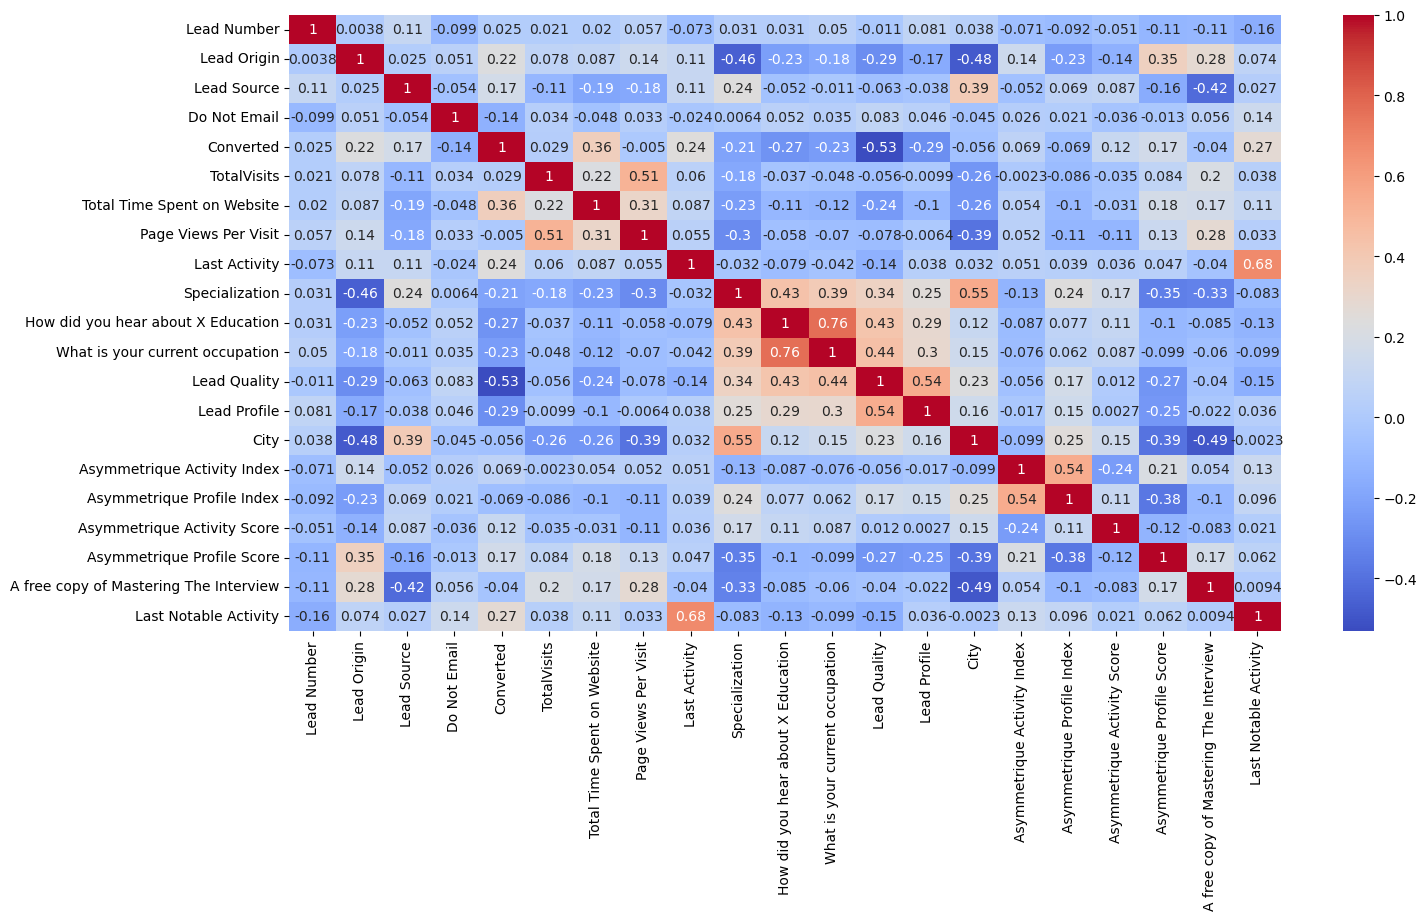

In [75]:
plt.figure(figsize=(16,8))

sns.heatmap(imputed_df.corr(), cmap="coolwarm", annot=True)
plt.show()

In [76]:
columns=imputed_df.columns

Lead Number


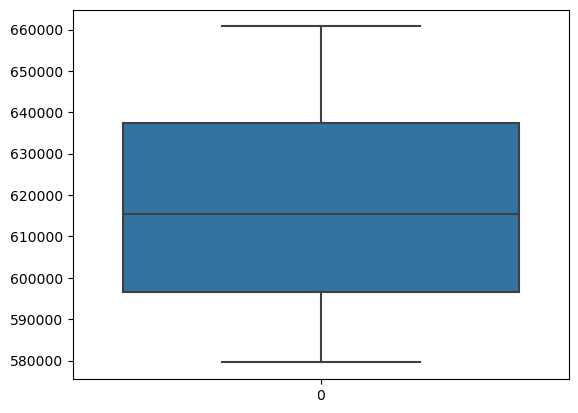

Lead Origin


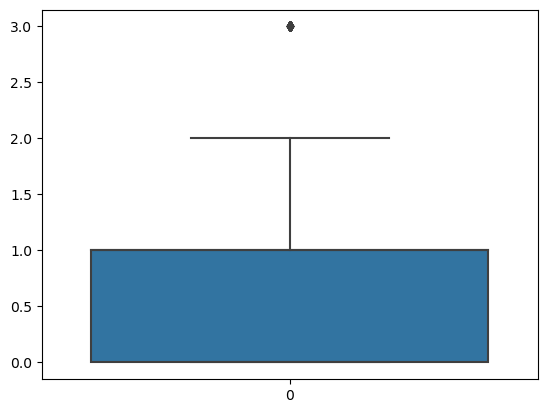

Lead Source


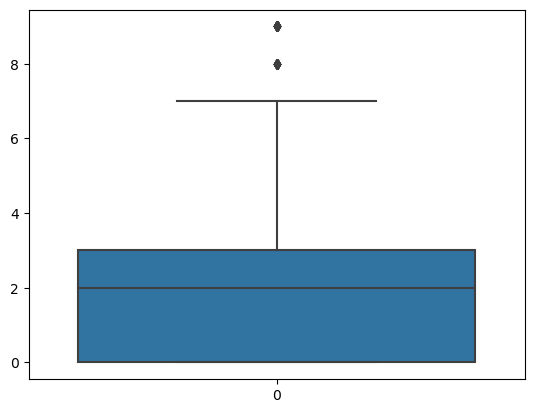

Do Not Email


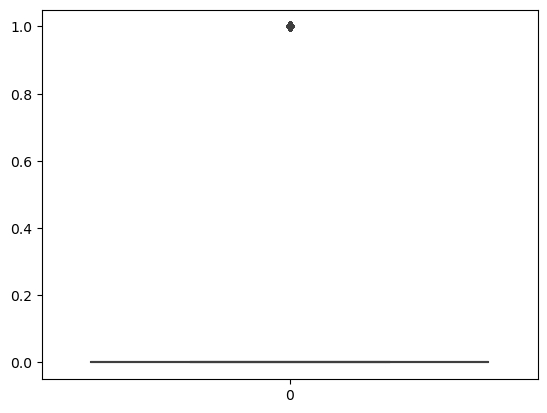

Converted


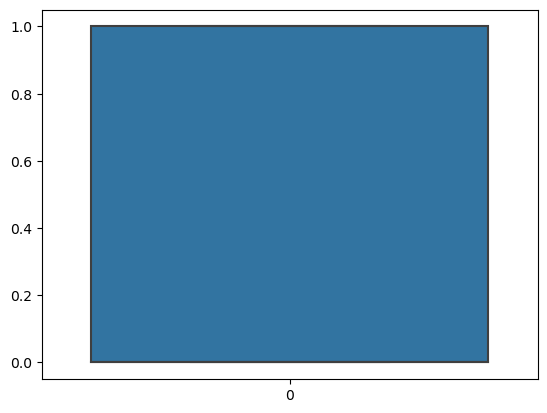

TotalVisits


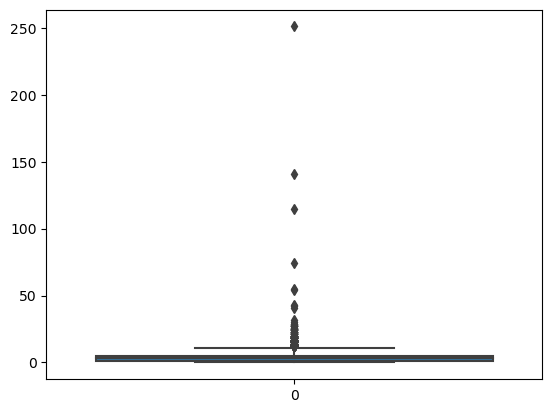

Total Time Spent on Website


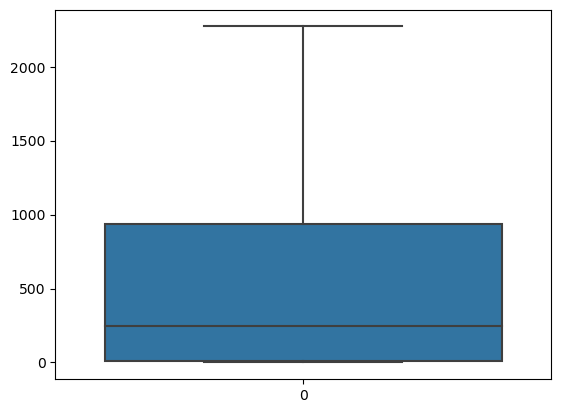

Page Views Per Visit


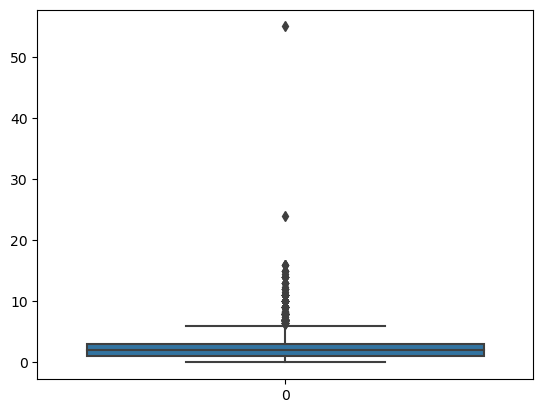

Last Activity


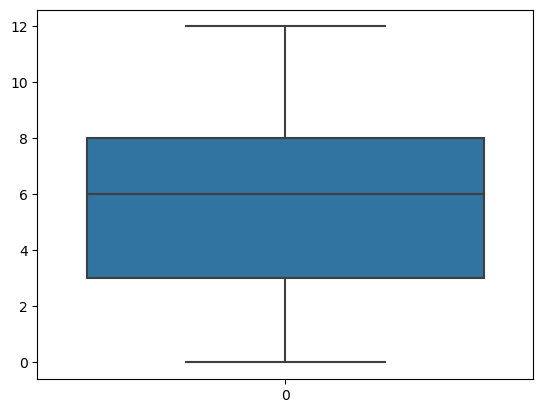

Specialization


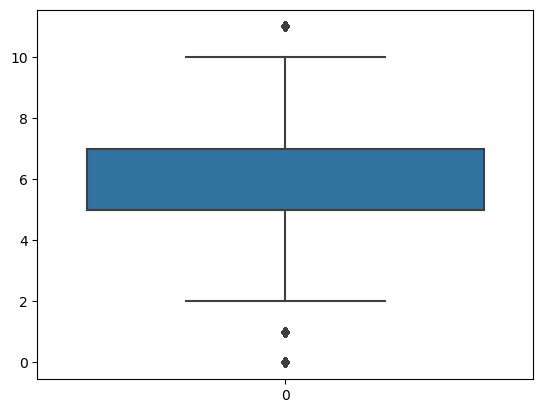

How did you hear about X Education


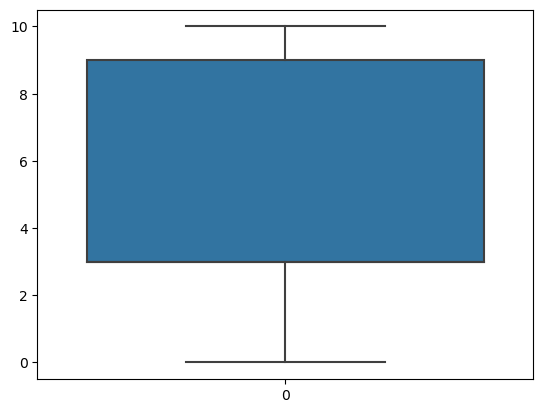

What is your current occupation


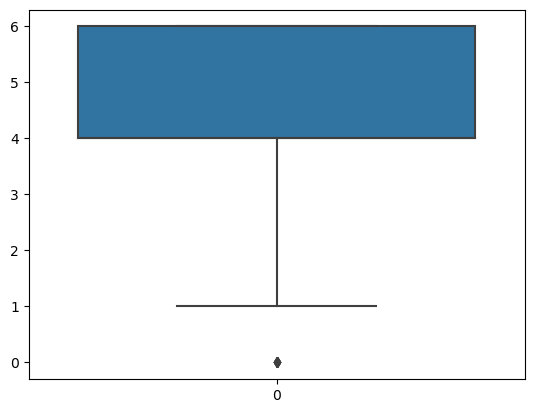

Lead Quality


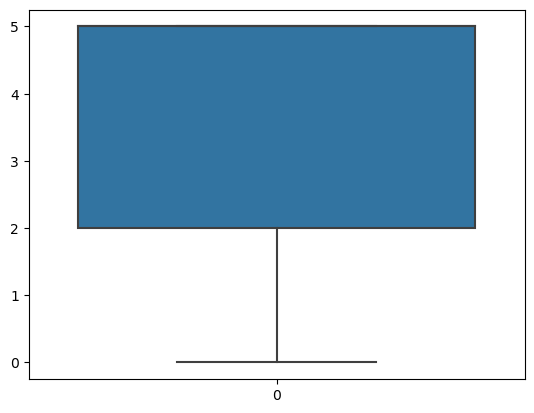

Lead Profile


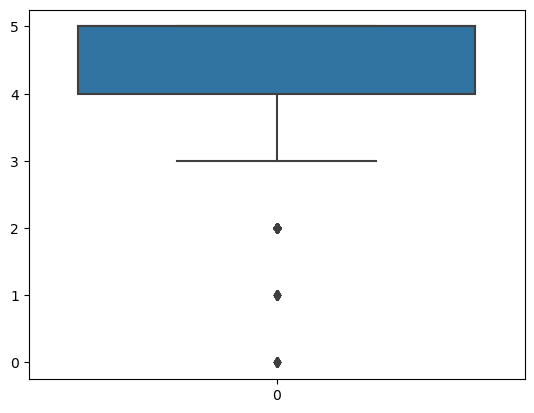

City


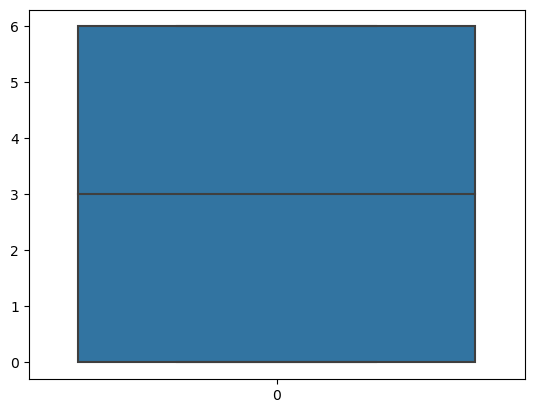

Asymmetrique Activity Index


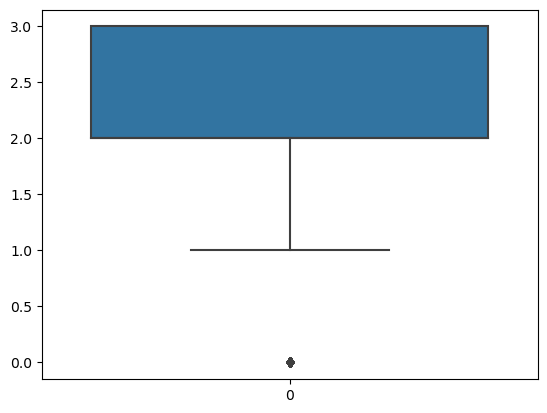

Asymmetrique Profile Index


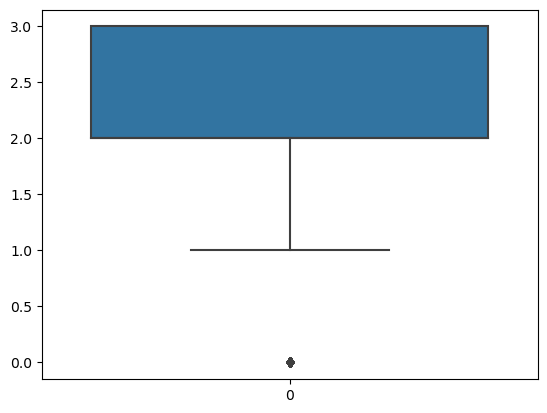

Asymmetrique Activity Score


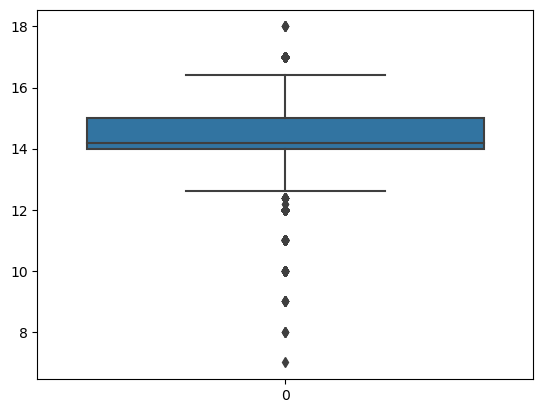

Asymmetrique Profile Score


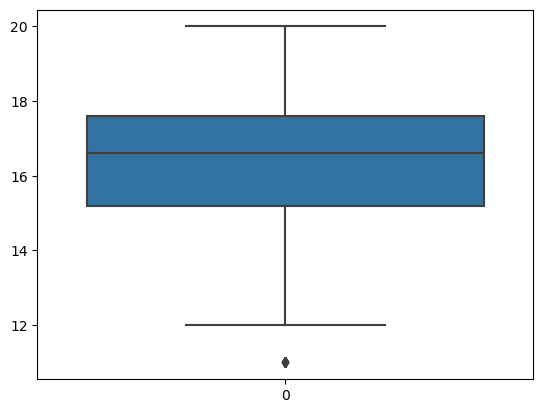

A free copy of Mastering The Interview


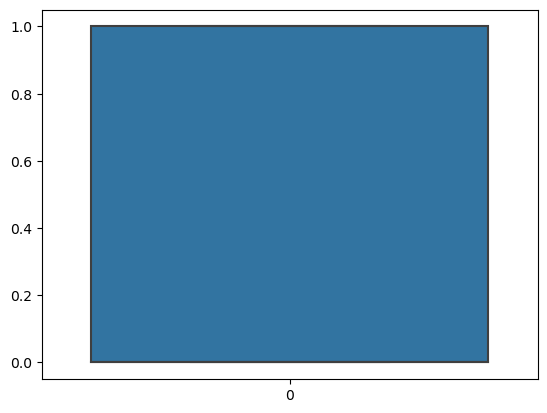

Last Notable Activity


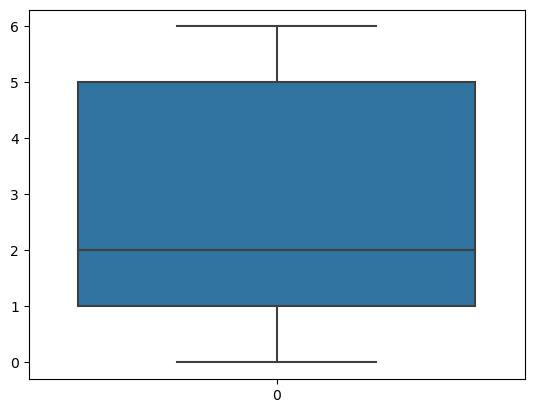

In [77]:
for col in columns:
    sns.boxplot(imputed_df[col])
    print(col)
    plt.show()

In [78]:
data = imputed_df['TotalVisits']
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data < lower_bound) | (data > upper_bound)

df_clean = imputed_df[~outliers]

<Axes: >

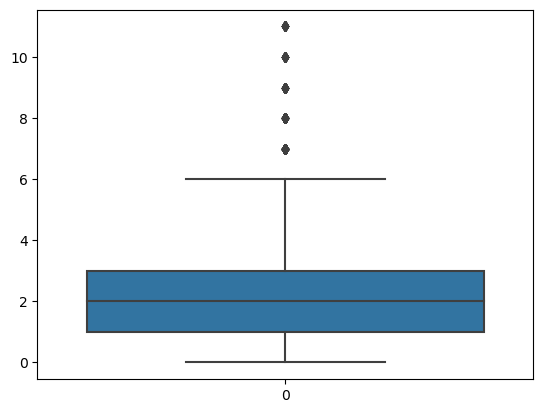

In [79]:
sns.boxplot(df_clean["Page Views Per Visit"])

In [80]:
data = df_clean['Page Views Per Visit']
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data < lower_bound) | (data > upper_bound)

df_clean = df_clean[~outliers]

In [81]:
df_clean

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737.0,0.0,3.0,0.0,0.0,0.0,0.0,0.00,7.0,7.0,3.0,4.0,1.0,5.0,6.0,2.0,2.0,15.0,15.0,0.0,2.0
1,660728.0,0.0,4.0,0.0,0.0,5.0,674.0,2.50,3.0,7.0,3.0,4.0,5.0,5.0,6.0,2.0,2.0,15.0,15.0,0.0,1.0
2,660727.0,1.0,0.0,0.0,1.0,2.0,1532.0,2.00,3.0,1.0,3.0,3.0,2.0,3.0,0.0,2.0,0.0,14.0,20.0,1.0,1.0
3,660719.0,1.0,0.0,0.0,0.0,1.0,305.0,1.00,9.0,6.0,9.0,4.0,3.0,5.0,0.0,2.0,0.0,13.0,17.0,0.0,2.0
4,660681.0,1.0,2.0,0.0,1.0,2.0,1428.0,1.00,0.0,7.0,5.0,4.0,2.0,5.0,0.0,2.0,0.0,15.0,18.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,579564.0,1.0,0.0,1.0,1.0,8.0,1845.0,2.67,11.0,5.0,3.0,4.0,0.0,3.0,0.0,2.0,0.0,15.0,17.0,0.0,6.0
9235,579546.0,1.0,0.0,0.0,0.0,2.0,238.0,2.00,8.0,6.0,3.0,4.0,2.0,3.0,0.0,2.0,0.0,14.0,19.0,1.0,5.0
9236,579545.0,1.0,0.0,1.0,0.0,2.0,199.0,2.00,8.0,1.0,3.0,4.0,3.0,3.0,0.0,2.0,0.0,13.0,20.0,1.0,5.0
9237,579538.0,1.0,2.0,0.0,1.0,3.0,499.0,3.00,8.0,5.0,4.0,6.0,5.0,5.0,3.0,2.0,2.0,15.0,16.0,0.0,5.0


In [82]:
df_clean.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
What is your current occupation           0
Lead Quality                              0
Lead Profile                              0
City                                      0
Asymmetrique Activity Index               0
Asymmetrique Profile Index                0
Asymmetrique Activity Score               0
Asymmetrique Profile Score                0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [83]:

from sklearn.model_selection import train_test_split
X=df_clean.drop('Converted', axis=1)
Y = df_clean['Converted']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)




In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model=logreg.fit(x_train_scaled,y_train)


In [86]:
y_pred=logreg.predict(x_test_scaled)

In [87]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [88]:
print("Accuracy:",accuracy)

Accuracy: 0.8437019969278033


In [89]:
y_pred_proba = logreg.predict_proba(x_train_scaled)


In [90]:
prob_class_1 = y_pred_proba[:, 1]


In [91]:
prob_class_1

array([0.17641415, 0.97544516, 0.19677372, ..., 0.07238224, 0.10155538,
       0.40963604])

In [92]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':prob_class_1})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0.0,0.176414,1639
1,1.0,0.975445,8079
2,0.0,0.196774,6536
3,0.0,0.086689,2705
4,0.0,0.327767,6571


In [93]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0.0,0.176414,1639,0
1,1.0,0.975445,8079,1
2,0.0,0.196774,6536,0
3,0.0,0.086689,2705,0
4,0.0,0.327767,6571,0


In [94]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.176414,1639,0,1,1,0,0,0,0,0,0,0,0
1,1.0,0.975445,8079,1,1,1,1,1,1,1,1,1,1,1
2,0.0,0.196774,6536,0,1,1,0,0,0,0,0,0,0,0
3,0.0,0.086689,2705,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.327767,6571,0,1,1,1,1,0,0,0,0,0,0


In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385249  1.000000  0.000000
0.1   0.1  0.629898  0.958120  0.424210
0.2   0.2  0.768686  0.901282  0.685592
0.3   0.3  0.806553  0.850000  0.779325
0.4   0.4  0.825156  0.792735  0.845474
0.5   0.5  0.825321  0.727350  0.886717
0.6   0.6  0.823510  0.669658  0.919925
0.7   0.7  0.804577  0.574786  0.948581
0.8   0.8  0.778729  0.470513  0.971880
0.9   0.9  0.725058  0.302564  0.989823


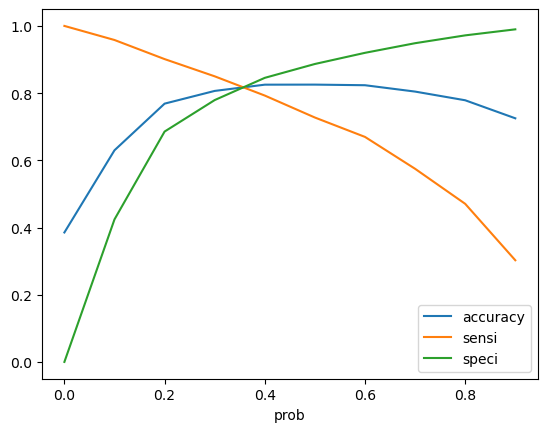

In [96]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [97]:
#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0.0,0.176414,1639,0,1,1,0,0,0,0,0,0,0,0,0
1,1.0,0.975445,8079,1,1,1,1,1,1,1,1,1,1,1,1
2,0.0,0.196774,6536,0,1,1,0,0,0,0,0,0,0,0,0
3,0.0,0.086689,2705,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.327767,6571,0,1,1,1,1,0,0,0,0,0,0,0


In [98]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0.0,0.176414,1639,0,18
1,1.0,0.975445,8079,1,98
2,0.0,0.196774,6536,0,20
3,0.0,0.086689,2705,0,9
4,0.0,0.327767,6571,0,33


In [99]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8251564043463945